In [1]:
import pandas as pd
import collections
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

In [2]:
# The data frame is called house_info
raw_info = pd.read_csv("kc_house_data.csv",error_bad_lines=False)

In [3]:
raw_info

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
house_info = pd.DataFrame({'Bedrooms':raw_info.bedrooms, 'Bathrooms':raw_info.bathrooms, 'Floors':raw_info.floors, 
                           'Year Built':raw_info.yr_built, 'Year Renoveted':raw_info.yr_renovated,
                           'Size of Basement':raw_info.sqft_basement,'Condition':raw_info.condition,
                          'Size of Above':raw_info.sqft_above,'Location':raw_info.zipcode,
                          'Price':raw_info.price})

In [5]:
house_info

,Bedrooms,Bathrooms,Floors,Year Built,Year Renoveted,Size of Basement,Condition,Size of Above,Location,Price
0,3,1.00,1.0,1955,0.0,0.0,3,1180,98178,221900.0
1,3,2.25,2.0,1951,1991.0,400.0,3,2170,98125,538000.0
2,2,1.00,1.0,1933,NaN,0.0,3,770,98028,180000.0
3,4,3.00,1.0,1965,0.0,910.0,5,1050,98136,604000.0
4,3,2.00,1.0,1987,0.0,0.0,3,1680,98074,510000.0
...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,2009,0.0,0.0,3,1530,98103,360000.0
21593,4,2.50,2.0,2014,0.0,0.0,3,2310,98146,400000.0
21594,2,0.75,2.0,2009,0.0,0.0,3,1020,98144,402101.0
21595,3,2.50,2.0,2004,0.0,0.0,3,1600,98027,400000.0


In [6]:
house_info.describe()

,Bedrooms,Bathrooms,Floors,Year Built,Year Renoveted,Condition,Size of Above,Location,Price
count,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,1.494096,1970.999676,83.636778,3.409825,1788.596842,98077.951845,5.402966e+05
std,0.926299,0.768984,0.539683,29.375234,399.946414,0.650546,827.759761,53.513072,3.673681e+05
min,1.000000,0.500000,1.000000,1900.000000,0.000000,1.000000,370.000000,98001.000000,7.800000e+04
25%,3.000000,1.750000,1.000000,1951.000000,0.000000,3.000000,1190.000000,98033.000000,3.220000e+05
50%,3.000000,2.250000,1.500000,1975.000000,0.000000,3.000000,1560.000000,98065.000000,4.500000e+05
75%,4.000000,2.500000,2.000000,1997.000000,0.000000,4.000000,2210.000000,98118.000000,6.450000e+05
max,33.000000,8.000000,3.500000,2015.000000,2015.000000,5.000000,9410.000000,98199.000000,7.700000e+06


In [82]:
def PRICE_BEDROOM(AMOUNT_BEDROOM):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bedrooms"].tolist()
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
    
    bedrooms_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedrooms_index.append(i)
    len(bedrooms_index)

    bedrooms_westking = []
    for i in bedrooms_index:
        if locations[i] == zip_loca[0] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[1] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[2] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[3] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[4]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[5] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[6] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[7]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[8] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[9] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[10] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[11] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[12]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[13] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[14] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[15] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[16]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[17] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[18]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[19] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[20]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[21] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[22] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[23] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[24] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[25] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[26] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[27] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[28]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[29] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[30] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[31]: bedrooms_westking.append(i)
        elif locations[i] == zip_loca[32] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[33] : bedrooms_westking.append(i)
        elif locations[i] == zip_loca[34] : bedrooms_westking.append(i)
        
    price = house_info["Price"].tolist()

    price_westking = []
    for i in bedrooms_westking:price_westking.append(price[i])
    return(price_westking)

no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
price_bedrooms_westking = []
for i in no_of_bedrooms:
    price_bedrooms_westking.append(PRICE_BEDROOM(i))
price_bedrooms_westking= sum(price_bedrooms_westking, [])
len(price_bedrooms_westking)

5816

In [83]:
def AMOUNT_BEDROOMS(AMOUNT_BEDROOM):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bedrooms"].tolist()
    X_value = []
    bedroom_index = []
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
        
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedroom_index.append(i)

    for i in bedroom_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_BEDROOM)
    
    
    
    return X_value
no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
amount_bedrooms_westking = []
for i in no_of_bedrooms:
    amount_bedrooms_westking.append(AMOUNT_BEDROOMS(i))
amount_bedrooms_westking= sum(amount_bedrooms_westking, [])
len(amount_bedrooms_westking)

5816

In [84]:
regressiondata1 = pd.DataFrame({'Amount_of_Bedrooms':amount_bedrooms_westking,
                                'Price':price_bedrooms_westking})
#regressiondata1 = regressiondata1.drop(3830)
regressiondata1

,Amount_of_Bedrooms,Price
0,3,221900.0
1,3,510000.0
2,3,229500.0
3,3,400000.0
4,3,667000.0
...,...,...
5811,8,680000.0
5812,8,1970000.0
5813,8,3300000.0
5814,9,450000.0


<ipython-input-110-02389451dce1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million',


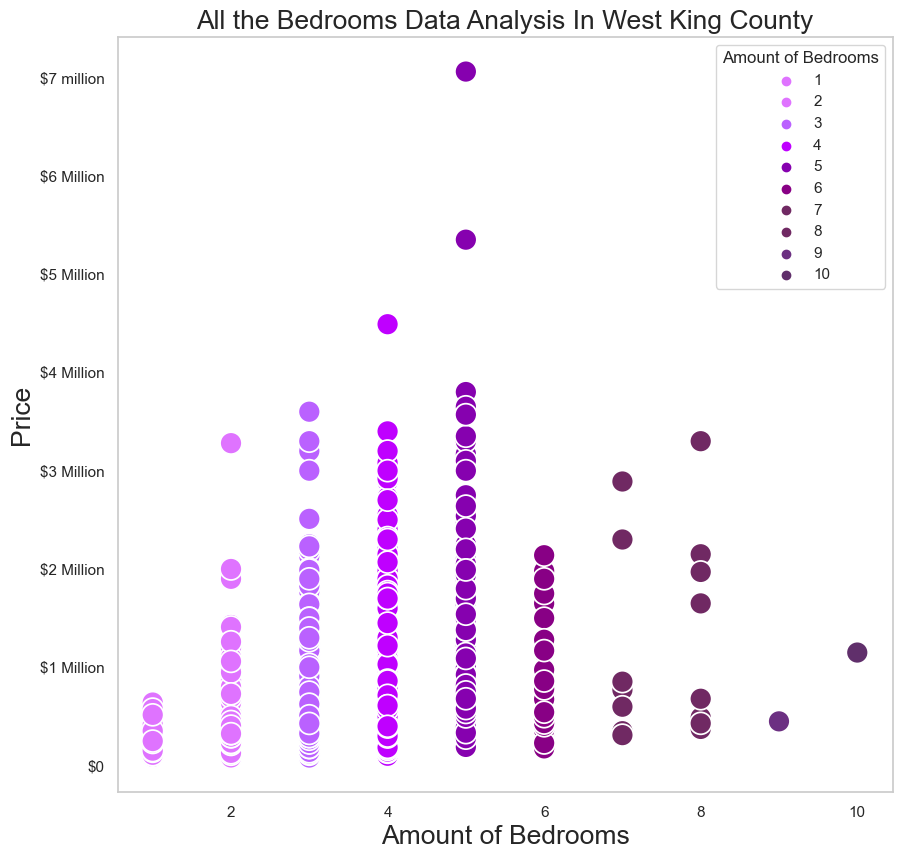

In [110]:
x = regressiondata1['Amount_of_Bedrooms']
y = regressiondata1['Price']
sns.set(style='whitegrid')
flatui = ['#df73ff','#df73ff','#ba61ff','#bf00ff','#8601af','#880085','#702963','#702963',
          '#6c3082','#602f6b']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata1, x=x, y=y,s=250,hue='Amount_of_Bedrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bedrooms Data Analysis In West King County',size=19)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Bedrooms')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million',
                    '$6 Million','$7 million'])
plt.show()

In [111]:
train_df, test_df = train_test_split(regressiondata1, test_size=0.10, shuffle=False)

In [112]:
X_train, y_train = train_df[['Amount_of_Bedrooms']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Bedrooms']], test_df[['Price']]

In [113]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [114]:
Quantile_regression = pd.DataFrame({'Amount_of_Bedrooms': X_test.reset_index()['Amount_of_Bedrooms'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [134]:
Quantile_regression[500:]

,Amount_of_Bedrooms,0.1,0.5,0.9,Price
500,6,283998.862974,630994.860369,1.771976e+06,780000.0
501,6,283998.862974,630994.860369,1.771976e+06,859950.0
502,6,283998.862974,630994.860369,1.771976e+06,1280000.0
503,6,283998.862974,630994.860369,1.771976e+06,1170000.0
504,1,175001.723835,310003.386578,6.000073e+05,245000.0
...,...,...,...,...,...
577,8,283998.862974,630994.860369,1.771976e+06,680000.0
578,8,283998.862974,630994.860369,1.771976e+06,1970000.0
579,8,283998.862974,630994.860369,1.771976e+06,3300000.0
580,9,283998.862974,630994.860369,1.771976e+06,450000.0


In [127]:
melted_data = pd.melt(Quantile_regression, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.drop(range(1746,2328))

In [128]:
melted_data

,Amount_of_Bedrooms,variable,value
0,5,0.1,2.839989e+05
1,5,0.1,2.839989e+05
2,5,0.1,2.839989e+05
3,5,0.1,2.839989e+05
4,5,0.1,2.839989e+05
...,...,...,...
1741,8,0.9,1.771976e+06
1742,8,0.9,1.771976e+06
1743,8,0.9,1.771976e+06
1744,9,0.9,1.771976e+06


In [140]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Bedrooms':[1,2,3,4,5,6,7,8,9,10],
    '0.1':[175001.723835,175001.723835,175001.723835,283998.862974,
           283998.862974,283998.862974,283998.862974,283998.862974,283998.862974,283998.862974],
'0.5':[310003.386578,310003.386578,310003.386578,630994.860369,630994.860369,630994.860369,
       630994.860369,630994.860369,630994.860369,630994.860369],
'0.9':[6.000073e+05,6.000073e+05,6.000073e+05,1.771976e+06,1.771976e+06,1.771976e+06,1.771976e+06,
      1.771976e+06,1.771976e+06,1.771976e+06]})
Quantileregression_updated


,Amount_of_Bedrooms,0.1,0.5,0.9
0,1,175001.723835,310003.386578,600007.3
1,2,175001.723835,310003.386578,600007.3
2,3,175001.723835,310003.386578,600007.3
3,4,283998.862974,630994.860369,1771976.0
4,5,283998.862974,630994.860369,1771976.0
5,6,283998.862974,630994.860369,1771976.0
6,7,283998.862974,630994.860369,1771976.0
7,8,283998.862974,630994.860369,1771976.0
8,9,283998.862974,630994.860369,1771976.0
9,10,283998.862974,630994.860369,1771976.0


In [141]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data


,Amount_of_Bedrooms,Percentile,value
0,1,0.1,1.750017e+05
1,2,0.1,1.750017e+05
2,3,0.1,1.750017e+05
3,4,0.1,2.839989e+05
4,5,0.1,2.839989e+05
5,6,0.1,2.839989e+05
6,7,0.1,2.839989e+05
7,8,0.1,2.839989e+05
8,9,0.1,2.839989e+05
9,10,0.1,2.839989e+05


<ipython-input-144-02ecfce71903>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$600,000',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$600,000'),
 Text(0, 1200000.0, '$1 Million'),
 Text(0, 1400000.0, '$1.2 Million'),
 Text(0, 1600000.0, '$1.4 Million'),
 Text(0, 1800000.0, '$1.6 Million'),
 Text(0, 2000000.0, '$1.8 Million')]

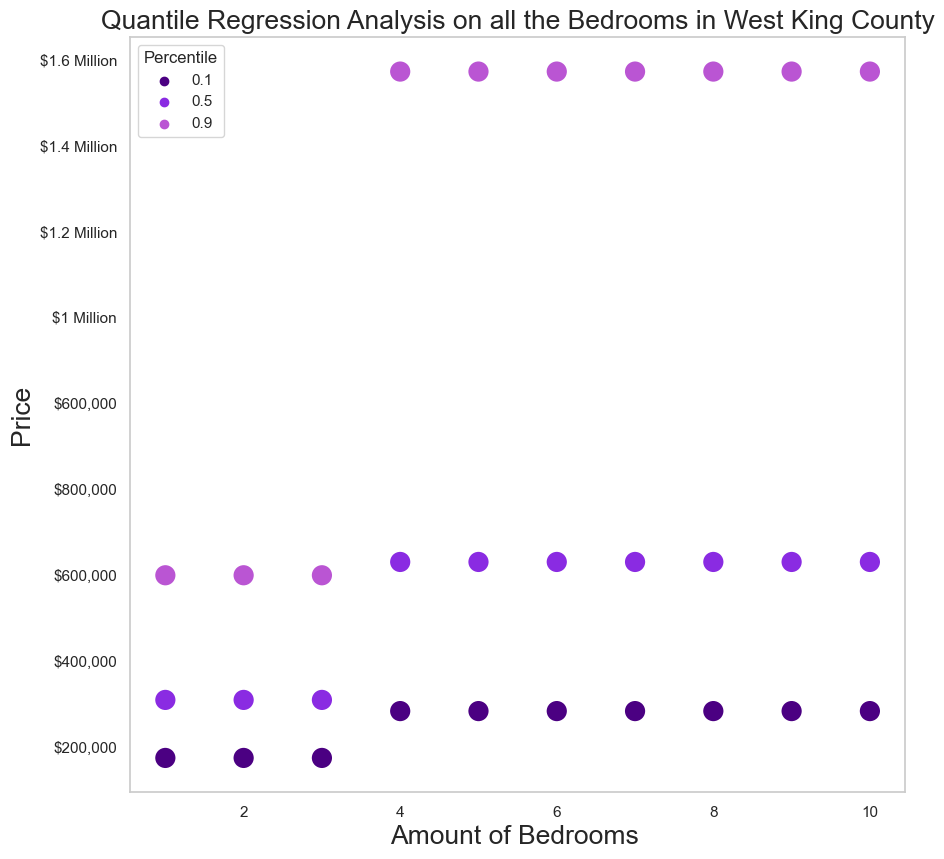

In [144]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax = sns.scatterplot(data=melted_data, x="Amount_of_Bedrooms", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
plt.gcf().set_size_inches((10,10))
ax.set_title('Quantile Regression Analysis on all the Bedrooms in West King County',size=19)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$600,000',
'$1 Million','$1.2 Million','$1.4 Million','$1.6 Million','$1.8 Million'])

<ipython-input-145-6ebcf216455c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$600,000',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$600,000'),
 Text(0, 1200000.0, '$1 Million'),
 Text(0, 1400000.0, '$1.2 Million'),
 Text(0, 1600000.0, '$1.4 Million'),
 Text(0, 1800000.0, '$1.6 Million'),
 Text(0, 2000000.0, '$1.8 Million')]

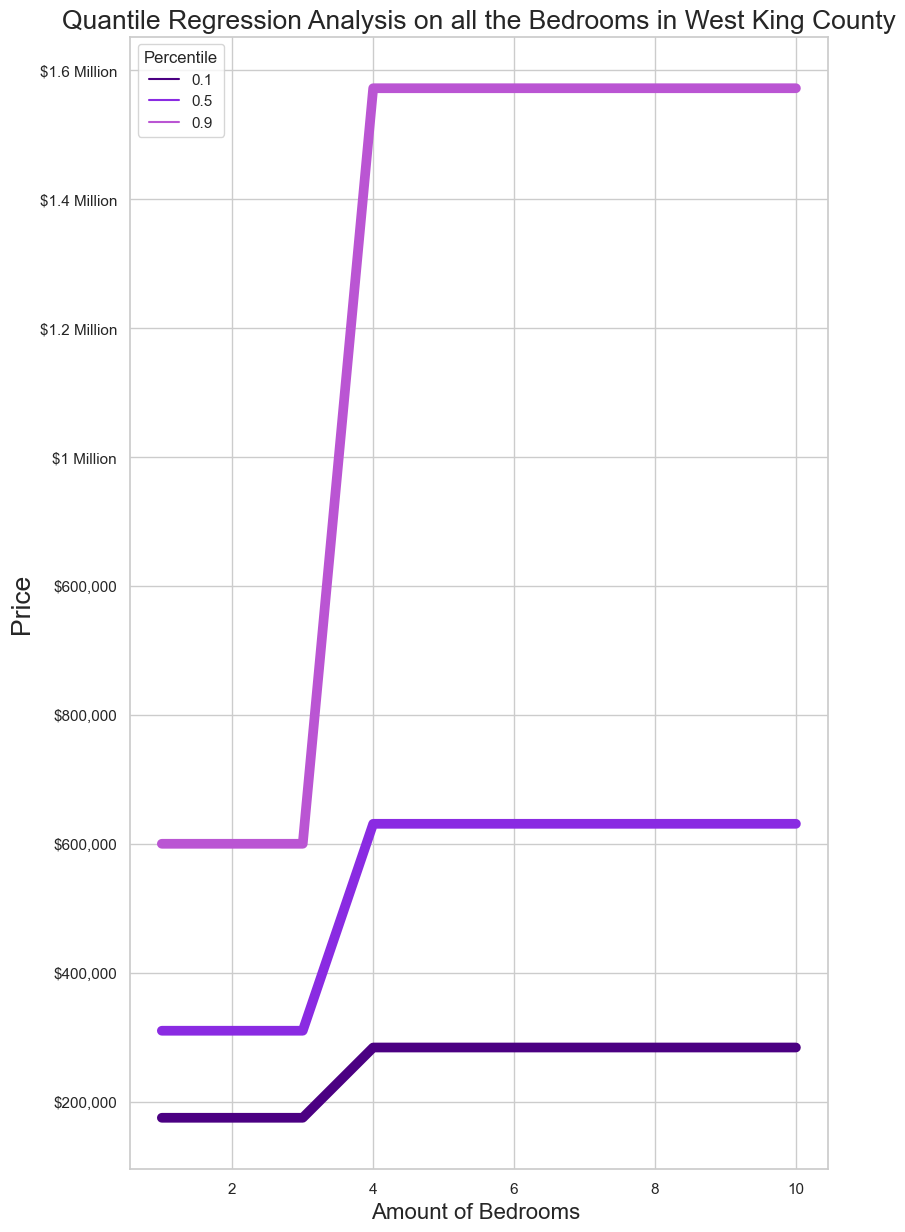

In [145]:
sns.set_style("whitegrid")
flatui = ["#4b0082","#8a2be2","#ba55d3"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Bedrooms",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Bedrooms in West King County',size=19)
plt.xlabel("Amount of Bedrooms ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$600,000',
'$1 Million','$1.2 Million','$1.4 Million','$1.6 Million','$1.8 Million'])

In [146]:
(Quantile_regression['Price'] > Quantile_regression['0.1']).value_counts()

True     544
False     38
dtype: int64

In [147]:
i = 0
y= 0
x = []
while i < 544:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 38:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [148]:
(Quantile_regression['Price'] > Quantile_regression['0.5']).value_counts()

False    307
True     275
dtype: int64

In [149]:
i = 0
y= 0
x = []
while i < 307:
    x.append('How Many Times The Predictionwas Was Right')
    i+=1
while y < 275:
    x.append('How Many Times The Predictionwas Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [151]:
(Quantile_regression['Price'] > Quantile_regression['0.9']).value_counts()

False    537
True      45
dtype: int64

In [152]:
i = 0
y= 0
x = []
while i < 537:
    x.append('How Many Times The Predictionwas Was Right')
    i+=1
while y < 45:
    x.append('How Many Times The Predictionwas Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

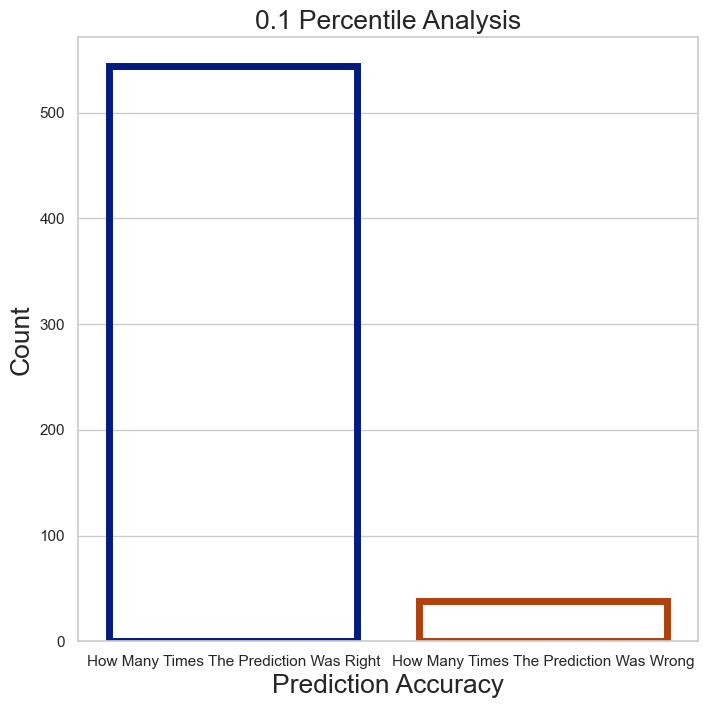

In [153]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

Text(0, 0.5, 'Count')

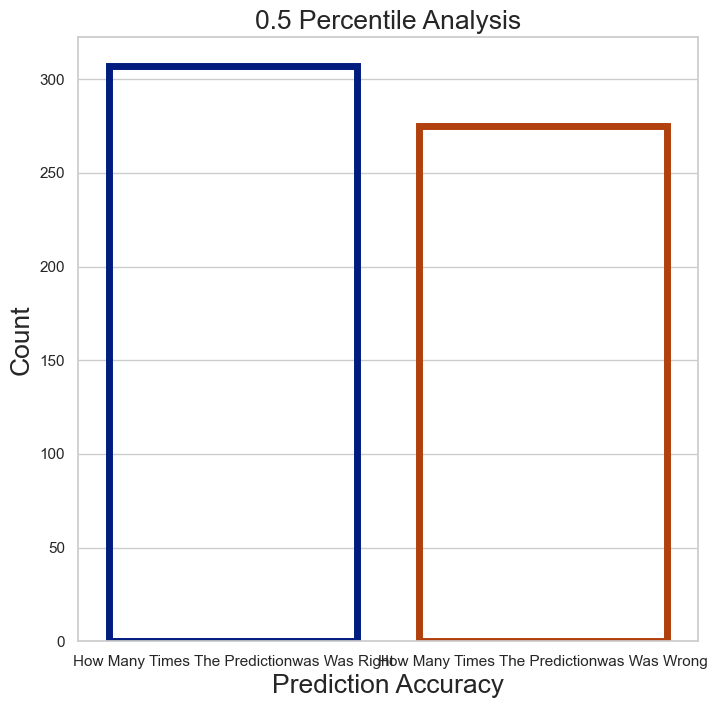

In [154]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

Text(0, 0.5, 'Count')

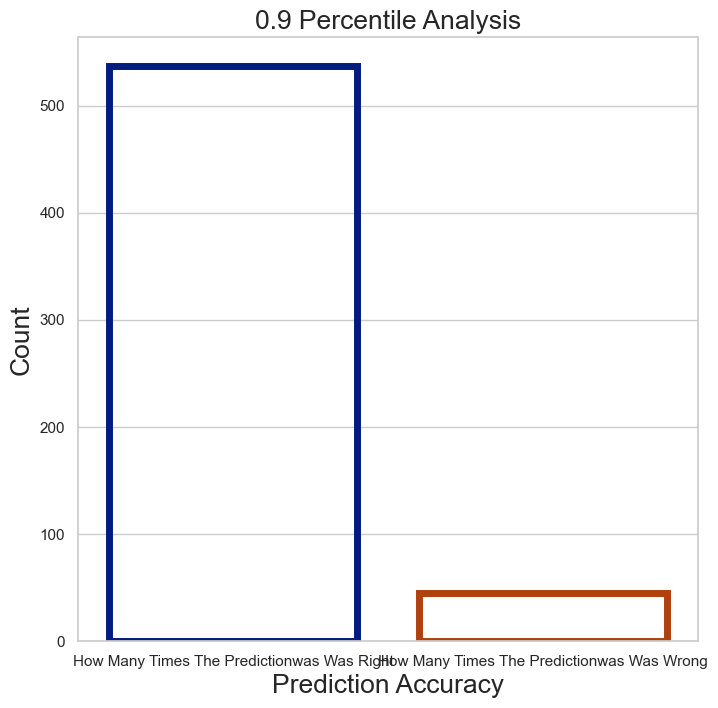

In [155]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [156]:
Predictions = []
for i in regressiondata1.Amount_of_Bedrooms:
    if i == 1:Predictions.append('Between: $175,001 - $600,007')
    if i == 2: Predictions.append('Between: $175,001 - $600,007')
    if i == 3:Predictions.append('Between: $175,001 - $600,007')
    if i == 4:Predictions.append('Between: $283,998 - $1,771,976') 
    if i == 5:Predictions.append('Between: $283,998 - $1,771,976')
    if i == 6:Predictions.append('Between: $283,998 - $1,771,976')
    if i == 7:Predictions.append('Between: $283,998 - $1,771,976')
    if i == 8:Predictions.append('Between: $283,998 - $1,771,976')
    if i == 9:Predictions.append('Between: $283,998 - $1,771,976')
    if i == 10:Predictions.append('Between: $283,998 - $1,771,976')
len(Predictions)

5816

In [157]:
price = []
for i in regressiondata1.Price:
    price.append("${:,.0f}".format(i))

In [158]:
Prediction = pd.DataFrame({'Amount of Bedrooms':regressiondata1.Amount_of_Bedrooms,
                           'Prediction':Predictions,'Actual Price':price})
Prediction

,Amount of Bedrooms,Prediction,Actual Price
0,3,"Between: $175,001 - $600,007","$221,900"
1,3,"Between: $175,001 - $600,007","$510,000"
2,3,"Between: $175,001 - $600,007","$229,500"
3,3,"Between: $175,001 - $600,007","$400,000"
4,3,"Between: $175,001 - $600,007","$667,000"
...,...,...,...
5811,8,"Between: $283,998 - $1,771,976","$680,000"
5812,8,"Between: $283,998 - $1,771,976","$1,970,000"
5813,8,"Between: $283,998 - $1,771,976","$3,300,000"
5814,9,"Between: $283,998 - $1,771,976","$450,000"


In [159]:
def AMOUNT_BATHROOMS(AMOUNT_BATHROOM):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bathrooms"].tolist()
    X_value = []
    bathroom_index = []
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
        
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)

    for i in bathroom_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_BATHROOM)
    
    return X_value
no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
amount_bathrooms_westking = []
for i in no_of_bathrooms:
    amount_bathrooms_westking.append(AMOUNT_BATHROOMS(i))
amount_bathrooms_westking= sum(amount_bathrooms_westking, [])
len(amount_bathrooms_westking)

5816

In [160]:
def PRICE_BATHROOM(AMOUNT_BATHROOM):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bath = house_info["Bathrooms"].tolist()

    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.494:index.append(i)
        if x == 47.495:index.append(i)
        if x == 47.455:index.append(i)  
        if x == 47.517:index.append(i)
        if x == 47.482:index.append(i)
        if x == 47.570:index.append(i)   
        if x == 47.620:index.append(i)
        if x == 47.610:index.append(i)
            
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
        
    bathroom_index = []
    for i,x in enumerate(amount_bath):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)
    len(bathroom_index)

    bathroom_westking = []
    for i in bathroom_index:
        if locations[i] == zip_loca[0] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[1] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[2] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[3] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[4]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[5] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[6] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[7]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[8] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[9] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[10] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[11] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[12]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[13] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[14] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[15] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[16]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[17] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[18]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[19] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[20]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[21] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[22] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[23] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[24] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[25] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[26] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[27] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[28]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[29] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[30] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[31]: bathroom_westking.append(i)
        elif locations[i] == zip_loca[32] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[33] : bathroom_westking.append(i)
        elif locations[i] == zip_loca[34] : bathroom_westking.append(i)
    price = house_info["Price"].tolist()

    price_westking = []
    for i in bathroom_westking:price_westking.append(price[i])
    return(price_westking)

no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
price_bathroom_westking = []
for i in no_of_bathrooms:
    price_bathroom_westking.append(PRICE_BATHROOM(i))
price_bathroom_westking = sum(price_bathroom_westking, [])
price_bathroom_westking

[605000.0,
 625000.0,
 345000.0,
 975000.0,
 437500.0,
 1090000.0,
 375000.0,
 430000.0,
 453246.0,
 425000.0,
 560000.0,
 465000.0,
 592500.0,
 445838.0,
 2400000.0,
 455000.0,
 389999.0,
 446500.0,
 834000.0,
 552250.0,
 380000.0,
 673000.0,
 810000.0,
 403950.0,
 437000.0,
 364950.0,
 538000.0,
 380000.0,
 365000.0,
 237000.0,
 722500.0,
 578000.0,
 490000.0,
 437500.0,
 650000.0,
 480000.0,
 346900.0,
 2130000.0,
 280000.0,
 725000.0,
 863000.0,
 619000.0,
 640000.0,
 900000.0,
 290000.0,
 360000.0,
 372500.0,
 595000.0,
 533600.0,
 485000.0,
 559950.0,
 430000.0,
 337000.0,
 507000.0,
 639000.0,
 429900.0,
 269950.0,
 675000.0,
 470000.0,
 347000.0,
 535800.0,
 370500.0,
 467000.0,
 457500.0,
 785000.0,
 1270000.0,
 324000.0,
 915000.0,
 524250.0,
 648000.0,
 515000.0,
 395000.0,
 360000.0,
 550000.0,
 285000.0,
 262000.0,
 515000.0,
 303000.0,
 510000.0,
 359000.0,
 925000.0,
 334950.0,
 460000.0,
 485500.0,
 685100.0,
 484000.0,
 441500.0,
 590000.0,
 403000.0,
 445000.0,
 53000

In [169]:
regressiondata2 = pd.DataFrame({'Amount_of_Bathrooms':amount_bathrooms_westking,
                                'Price':price_bathroom_westking})
k = regressiondata2.Amount_of_Bathrooms.value_counts()
len(k)

24

<ipython-input-281-27dec39cf9a0>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million',


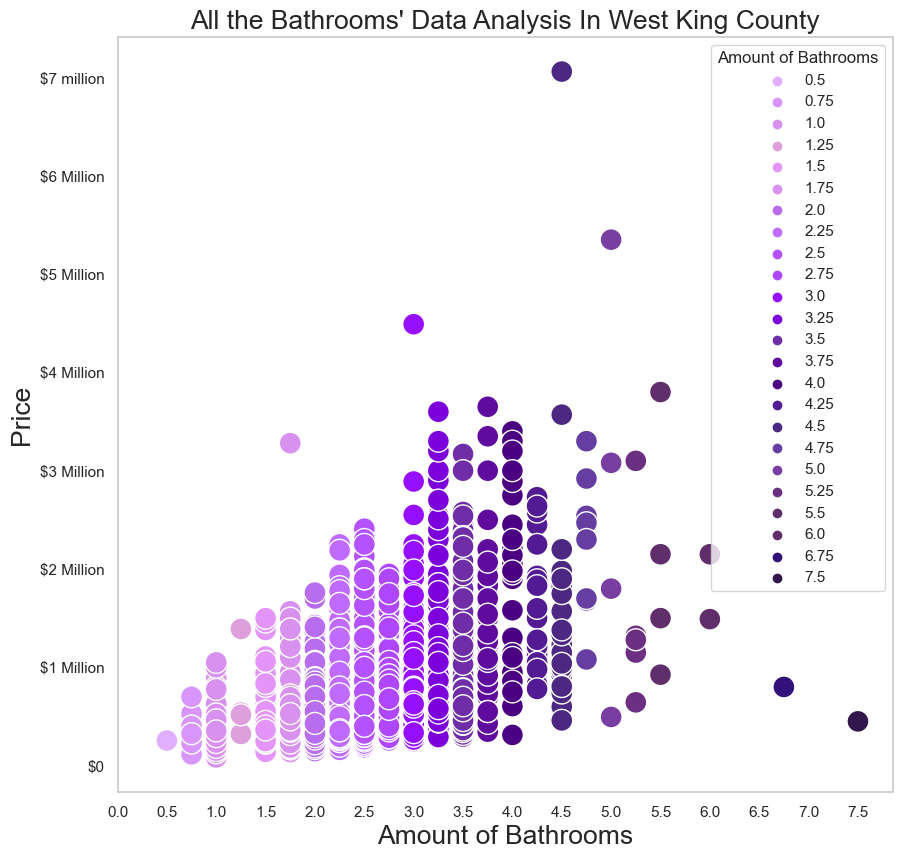

In [281]:
x = regressiondata2['Amount_of_Bathrooms']
y = regressiondata2['Price']
flatui = ['#e0b0ff','#d895fc','#d891ef','#dda0dd','#e395f9','#d891ef',
          '#b76dee','#bf6bff',
          '#b452ff','#af47ff','#970fff','#7c00db',
          
           
         '#6f2da8','#5f0b9e','#4b0082','#521b93','#4c2882','#663ea1','#783ea1',
          
          '#6c3082', '#602f6b','#602f6b','#32127a','#32174d',
          ]

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata2, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Bathrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bathrooms\' Data Analysis In West King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.legend(title='Amount of Bathrooms')
plt.ylabel("Price", size=19)
plt.xticks(np.arange(0,7.75,0.5))
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million',
                    '$6 Million','$7 million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()

plt.show()